### Tf-keras 和 keras 区别
- tf.kears

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn 
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.2
sklearn 0.22.2.post1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [4]:
# 归一化
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
# x_train: [None,28,28]-> [None,784]
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled=scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [6]:
# tf.keras.models.Sequential()

model=keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    """
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.BatchNormaliztion())
    model.add(keras.layers.Activation('relu'))
    """
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [7]:
# Tensorboard , earlystopping , ModelCheckpoint
logdir = './dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file=os.path.join(logdir, "fashion_mnist_model.h5")

callbacks=[
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3),

]

history=model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_valid_scaled,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 24s 428us/sample - loss: 1.0881 - accuracy: 0.6130 - val_loss: 0.6628 - val_accuracy: 0.7682
Epoch 2/10
55000/55000 [==============================] - 17s 304us/sample - loss: 0.7547 - accuracy: 0.7327 - val_loss: 0.5439 - val_accuracy: 0.8096
Epoch 3/10
55000/55000 [==============================] - 16s 287us/sample - loss: 0.6470 - accuracy: 0.7758 - val_loss: 0.5053 - val_accuracy: 0.8190
Epoch 4/10
55000/55000 [==============================] - 16s 285us/sample - loss: 0.5908 - accuracy: 0.7952 - val_loss: 0.4556 - val_accuracy: 0.8344
Epoch 5/10
55000/55000 [==============================] - 17s 300us/sample - loss: 0.5500 - accuracy: 0.8088 - val_loss: 0.4238 - val_accuracy: 0.8466
Epoch 6/10
55000/55000 [==============================] - 17s 313us/sample - loss: 0.5086 - accuracy: 0.8227 - val_loss: 0.4027 - val_accuracy: 0.8582
Epoch 7/10
55000/55000 [=====================

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

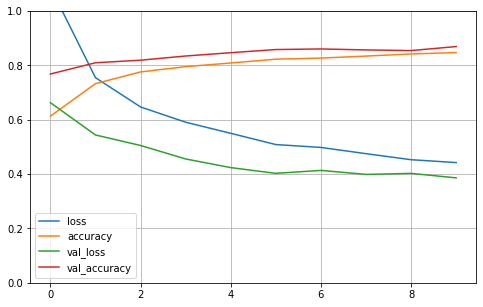

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

#1.参数众多，训练不动
#2.梯度消失

In [10]:
model.evaluate(x_test_scaled,y_test)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.4069 - accuracy: 0.8597


[0.4068930248975754, 0.8597]